In [1]:
# all needed imports
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
import imblearn
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
import time 
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn import tree

In [2]:
np.random.seed(1)
data = pd.read_csv('processed_data.csv')
data

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,0,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
1,1,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
2,2,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
3,3,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
4,4,MA,121,510,0,1,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,4245,MT,83,415,0,0,0,188.3,70,243.8,88,213.7,79,10.3,6,0,0
4246,4246,WV,73,408,0,0,0,177.9,89,131.2,82,186.2,89,11.5,6,3,0
4247,4247,NC,75,408,0,0,0,170.7,101,193.1,126,129.1,104,6.9,7,1,0
4248,4248,HI,50,408,0,1,40,235.7,127,223.0,126,297.5,116,9.9,5,2,0


# Decision Tree Classifier 

Here we will fit multiple decision tree classifiers

### Without changes

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# make function for printing results as it will be  used plenty of times
def print_scores(model_name, y_test, y_preds):
    print(model_name)
    print('Accuracy: ', accuracy_score(y_test, y_preds))
    print('ROC-AUC: ', roc_auc_score(y_test, y_preds))
    print('F-score: ', f1_score(y_test, y_preds), '\n\n')
    print('Time: ', finish - start)

In [5]:
# take only numerical features as they are supoorted (CatBoost later will be trained with categorical)
columns = ['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'number_customer_service_calls'
]

In [6]:
# model fit
X = data[columns]
y = data['churn']
# fix random state in order not to be biased by the sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

start = time.time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Decision Tree Classifier. Without changes', y_test, y_preds)

Decision Tree Classifier. Without changes
Accuracy:  0.9194583036350678
ROC-AUC:  0.8521692986924775
F-score:  0.7237163814180929 


Time:  0.02520895004272461


### Oversampling 

<AxesSubplot:xlabel='churn', ylabel='Count'>

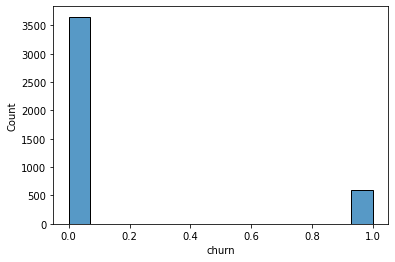

In [7]:
# initial distribution of target variable
sns.histplot(y)

<AxesSubplot:xlabel='churn', ylabel='Count'>

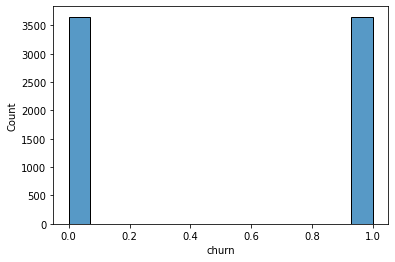

In [8]:
# oversampling minor class
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
sns.histplot(y_over)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33, random_state=1)

start = time.time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Decision Tree Classifier. Oversampling', y_test, y_preds)

Decision Tree Classifier. Oversampling
Accuracy:  0.9618415595188718
ROC-AUC:  0.9619205298013245
F-score:  0.9631705364291433 


Time:  0.02620697021484375


### Undersampling 

<AxesSubplot:xlabel='churn', ylabel='Count'>

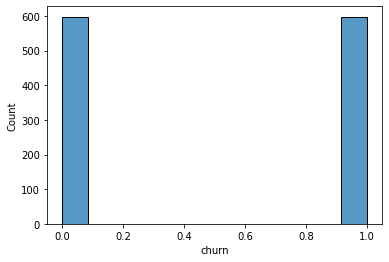

In [10]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
sns.histplot(y_under)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.33, random_state=1)

start = time.time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Decision Tree Classifier. Undersampling', y_test, y_preds)

Decision Tree Classifier. Undersampling
Accuracy:  0.8227848101265823
ROC-AUC:  0.8228349484694661
F-score:  0.8258706467661692 


Time:  0.008555889129638672


### SMOTE 

<AxesSubplot:xlabel='churn', ylabel='Count'>

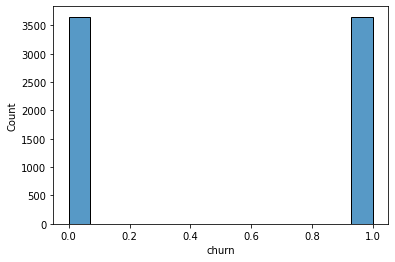

In [12]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
sns.histplot(y_smote)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.33, random_state=1)

start = time.time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Decision Tree Classifier. SMOTE', y_test, y_preds)

Decision Tree Classifier. SMOTE
Accuracy:  0.8548320199087516
ROC-AUC:  0.8548726830825805
F-score:  0.8573757131214343 


Time:  0.03982996940612793


Here we can see that train/test split perofrms good, so no cross-validation 

# Logistic Regression 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

start = time.time()
clf = LogisticRegression(max_iter=100000)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Logistic Regression Classifier. Without changes', y_test, y_preds)

Logistic Regression Classifier. Without changes
Accuracy:  0.8652886671418389
ROC-AUC:  0.5841908643233146
F-score:  0.28679245283018867 


Time:  0.5032269954681396


### Oversampling 

<AxesSubplot:xlabel='churn', ylabel='Count'>

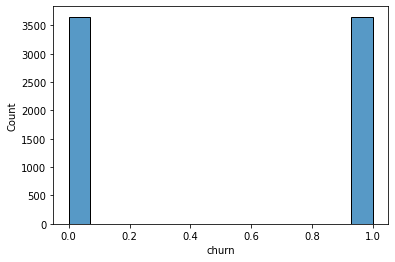

In [15]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
sns.histplot(y_over)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33, random_state=1)

start = time.time()
clf = LogisticRegression(max_iter=100000)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Logistic Regression Classifier. Oversampling', y_test, y_preds)

Logistic Regression Classifier. Oversampling
Accuracy:  0.7577768560763168
ROC-AUC:  0.7577792549531249
F-score:  0.7576763485477178 


Time:  0.8350589275360107


### Undersampling

<AxesSubplot:xlabel='churn', ylabel='Count'>

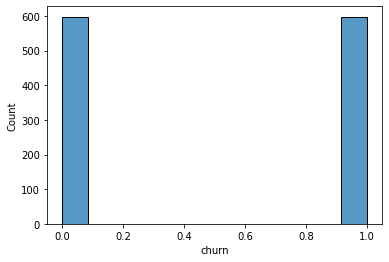

In [17]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
sns.histplot(y_under)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.33, random_state=1)

start = time.time()
clf = LogisticRegression(max_iter=100000)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Logistic Regression Classifier. Undersampling', y_test, y_preds)

Logistic Regression Classifier. Undersampling
Accuracy:  0.759493670886076
ROC-AUC:  0.7594857201456188
F-score:  0.7582697201017812 


Time:  0.45541882514953613


### SMOTE 

<AxesSubplot:xlabel='churn', ylabel='Count'>

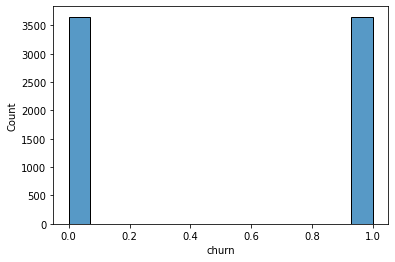

In [19]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
sns.histplot(y_smote)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.33, random_state=1)

start = time.time()
clf = LogisticRegression(max_iter=100000)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Logistic Regression Classifier. SMOTE', y_test, y_preds)

Logistic Regression Classifier. SMOTE
Accuracy:  0.7378681045209456
ROC-AUC:  0.7379478318552406
F-score:  0.7472 


Time:  1.053487777709961


# Random Forest Classifier 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

start = time.time()
clf = RandomForestClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Random Forest Classifier. Without changes', y_test, y_preds)

Random Forest Classifier. Without changes
Accuracy:  0.9600855310049893
ROC-AUC:  0.8736118186449312
F-score:  0.8400000000000001 


Time:  0.49207496643066406


### Oversampling

<AxesSubplot:xlabel='churn', ylabel='Count'>

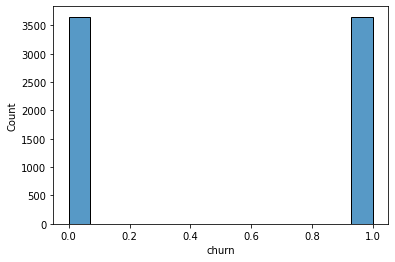

In [22]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
sns.histplot(y_over)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33, random_state=1)

start = time.time()
clf = RandomForestClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Random Forest Classifier. Oversampling', y_test, y_preds)

Random Forest Classifier. Oversampling
Accuracy:  0.990460389879718
ROC-AUC:  0.9904801324503311
F-score:  0.9905310827501028 


Time:  0.777587890625


### Undersampling

<AxesSubplot:xlabel='churn', ylabel='Count'>

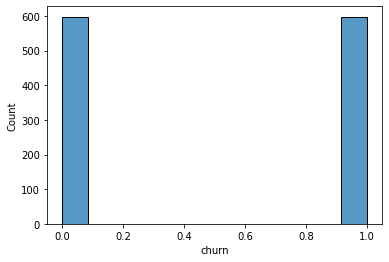

In [24]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
sns.histplot(y_under)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.33, random_state=1)

start = time.time()
clf = RandomForestClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Random Forest Classifier. Undersampling', y_test, y_preds)

Random Forest Classifier. Undersampling
Accuracy:  0.8683544303797468
ROC-AUC:  0.868379223709173
F-score:  0.8693467336683418 


Time:  0.21892714500427246


### SMOTE 

<AxesSubplot:xlabel='churn', ylabel='Count'>

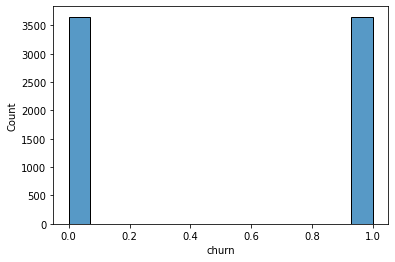

In [26]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
sns.histplot(y_smote)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.33, random_state=1)

start = time.time()
clf = RandomForestClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('Random Forest Classifier. SMOTE', y_test, y_preds)

Random Forest Classifier. SMOTE
Accuracy:  0.9431771049357113
ROC-AUC:  0.9431278316350404
F-score:  0.9416773094934014 


Time:  0.6648960113525391


# CatBoost GBM

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

start = time.time()
clf = CatBoostClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('CatBoost GBM. Without changes', y_test, y_preds)

Learning rate set to 0.016105
0:	learn: 0.6781556	total: 53.5ms	remaining: 53.4s
1:	learn: 0.6597038	total: 59.1ms	remaining: 29.5s
2:	learn: 0.6437678	total: 63.9ms	remaining: 21.2s
3:	learn: 0.6285353	total: 68ms	remaining: 16.9s
4:	learn: 0.6153338	total: 75.3ms	remaining: 15s
5:	learn: 0.6019131	total: 79.8ms	remaining: 13.2s
6:	learn: 0.5907920	total: 84.3ms	remaining: 12s
7:	learn: 0.5793894	total: 91.9ms	remaining: 11.4s
8:	learn: 0.5680397	total: 98.2ms	remaining: 10.8s
9:	learn: 0.5556769	total: 105ms	remaining: 10.4s
10:	learn: 0.5426363	total: 112ms	remaining: 10.1s
11:	learn: 0.5325848	total: 120ms	remaining: 9.85s
12:	learn: 0.5229453	total: 127ms	remaining: 9.65s
13:	learn: 0.5142889	total: 133ms	remaining: 9.35s
14:	learn: 0.5050793	total: 141ms	remaining: 9.23s
15:	learn: 0.4949368	total: 148ms	remaining: 9.09s
16:	learn: 0.4859588	total: 152ms	remaining: 8.8s
17:	learn: 0.4774579	total: 158ms	remaining: 8.61s
18:	learn: 0.4695455	total: 162ms	remaining: 8.35s
19:	learn

179:	learn: 0.1614267	total: 1.37s	remaining: 6.23s
180:	learn: 0.1610871	total: 1.37s	remaining: 6.22s
181:	learn: 0.1605908	total: 1.38s	remaining: 6.2s
182:	learn: 0.1602374	total: 1.38s	remaining: 6.18s
183:	learn: 0.1599283	total: 1.39s	remaining: 6.16s
184:	learn: 0.1594846	total: 1.39s	remaining: 6.14s
185:	learn: 0.1589819	total: 1.4s	remaining: 6.13s
186:	learn: 0.1587696	total: 1.41s	remaining: 6.12s
187:	learn: 0.1585393	total: 1.41s	remaining: 6.1s
188:	learn: 0.1582905	total: 1.42s	remaining: 6.08s
189:	learn: 0.1579361	total: 1.42s	remaining: 6.07s
190:	learn: 0.1575276	total: 1.43s	remaining: 6.05s
191:	learn: 0.1573327	total: 1.44s	remaining: 6.04s
192:	learn: 0.1569042	total: 1.44s	remaining: 6.03s
193:	learn: 0.1566508	total: 1.45s	remaining: 6.01s
194:	learn: 0.1562754	total: 1.45s	remaining: 6s
195:	learn: 0.1558642	total: 1.46s	remaining: 5.98s
196:	learn: 0.1554335	total: 1.46s	remaining: 5.96s
197:	learn: 0.1550237	total: 1.47s	remaining: 5.93s
198:	learn: 0.1545

371:	learn: 0.1232994	total: 2.35s	remaining: 3.96s
372:	learn: 0.1232372	total: 2.35s	remaining: 3.95s
373:	learn: 0.1230884	total: 2.35s	remaining: 3.94s
374:	learn: 0.1229855	total: 2.36s	remaining: 3.93s
375:	learn: 0.1228944	total: 2.37s	remaining: 3.92s
376:	learn: 0.1228322	total: 2.37s	remaining: 3.92s
377:	learn: 0.1227313	total: 2.37s	remaining: 3.91s
378:	learn: 0.1226848	total: 2.38s	remaining: 3.9s
379:	learn: 0.1226587	total: 2.38s	remaining: 3.89s
380:	learn: 0.1224125	total: 2.39s	remaining: 3.88s
381:	learn: 0.1222669	total: 2.39s	remaining: 3.87s
382:	learn: 0.1220775	total: 2.39s	remaining: 3.85s
383:	learn: 0.1219301	total: 2.4s	remaining: 3.84s
384:	learn: 0.1218480	total: 2.4s	remaining: 3.83s
385:	learn: 0.1217424	total: 2.4s	remaining: 3.83s
386:	learn: 0.1216573	total: 2.41s	remaining: 3.82s
387:	learn: 0.1215156	total: 2.42s	remaining: 3.81s
388:	learn: 0.1214166	total: 2.42s	remaining: 3.8s
389:	learn: 0.1211026	total: 2.42s	remaining: 3.79s
390:	learn: 0.120

569:	learn: 0.1021471	total: 3.33s	remaining: 2.51s
570:	learn: 0.1020528	total: 3.33s	remaining: 2.5s
571:	learn: 0.1020435	total: 3.33s	remaining: 2.5s
572:	learn: 0.1019618	total: 3.34s	remaining: 2.49s
573:	learn: 0.1019409	total: 3.34s	remaining: 2.48s
574:	learn: 0.1018037	total: 3.35s	remaining: 2.47s
575:	learn: 0.1017313	total: 3.35s	remaining: 2.46s
576:	learn: 0.1016518	total: 3.35s	remaining: 2.46s
577:	learn: 0.1016155	total: 3.36s	remaining: 2.45s
578:	learn: 0.1015140	total: 3.36s	remaining: 2.44s
579:	learn: 0.1014737	total: 3.36s	remaining: 2.43s
580:	learn: 0.1014204	total: 3.37s	remaining: 2.43s
581:	learn: 0.1013406	total: 3.37s	remaining: 2.42s
582:	learn: 0.1012693	total: 3.38s	remaining: 2.42s
583:	learn: 0.1011659	total: 3.38s	remaining: 2.41s
584:	learn: 0.1010781	total: 3.38s	remaining: 2.4s
585:	learn: 0.1009725	total: 3.39s	remaining: 2.39s
586:	learn: 0.1009562	total: 3.39s	remaining: 2.38s
587:	learn: 0.1009466	total: 3.39s	remaining: 2.38s
588:	learn: 0.1

739:	learn: 0.0876714	total: 3.91s	remaining: 1.37s
740:	learn: 0.0876208	total: 3.91s	remaining: 1.37s
741:	learn: 0.0875865	total: 3.91s	remaining: 1.36s
742:	learn: 0.0874757	total: 3.92s	remaining: 1.35s
743:	learn: 0.0873508	total: 3.92s	remaining: 1.35s
744:	learn: 0.0873374	total: 3.93s	remaining: 1.34s
745:	learn: 0.0872582	total: 3.93s	remaining: 1.34s
746:	learn: 0.0870673	total: 3.93s	remaining: 1.33s
747:	learn: 0.0869987	total: 3.94s	remaining: 1.32s
748:	learn: 0.0868882	total: 3.94s	remaining: 1.32s
749:	learn: 0.0867515	total: 3.94s	remaining: 1.31s
750:	learn: 0.0867439	total: 3.95s	remaining: 1.31s
751:	learn: 0.0865753	total: 3.95s	remaining: 1.3s
752:	learn: 0.0864523	total: 3.95s	remaining: 1.3s
753:	learn: 0.0863439	total: 3.96s	remaining: 1.29s
754:	learn: 0.0862847	total: 3.96s	remaining: 1.28s
755:	learn: 0.0862112	total: 3.96s	remaining: 1.28s
756:	learn: 0.0860920	total: 3.97s	remaining: 1.27s
757:	learn: 0.0859858	total: 3.97s	remaining: 1.27s
758:	learn: 0.

916:	learn: 0.0739003	total: 4.48s	remaining: 406ms
917:	learn: 0.0738422	total: 4.49s	remaining: 401ms
918:	learn: 0.0737476	total: 4.49s	remaining: 396ms
919:	learn: 0.0737299	total: 4.49s	remaining: 391ms
920:	learn: 0.0736350	total: 4.5s	remaining: 386ms
921:	learn: 0.0735580	total: 4.5s	remaining: 381ms
922:	learn: 0.0734284	total: 4.51s	remaining: 376ms
923:	learn: 0.0733262	total: 4.51s	remaining: 371ms
924:	learn: 0.0732152	total: 4.52s	remaining: 366ms
925:	learn: 0.0731306	total: 4.52s	remaining: 361ms
926:	learn: 0.0730685	total: 4.53s	remaining: 356ms
927:	learn: 0.0730316	total: 4.53s	remaining: 351ms
928:	learn: 0.0729471	total: 4.53s	remaining: 346ms
929:	learn: 0.0728405	total: 4.54s	remaining: 342ms
930:	learn: 0.0727496	total: 4.54s	remaining: 337ms
931:	learn: 0.0726489	total: 4.55s	remaining: 332ms
932:	learn: 0.0726043	total: 4.55s	remaining: 327ms
933:	learn: 0.0724923	total: 4.56s	remaining: 322ms
934:	learn: 0.0724340	total: 4.56s	remaining: 317ms
935:	learn: 0.

### Oversampling

<AxesSubplot:xlabel='churn', ylabel='Count'>

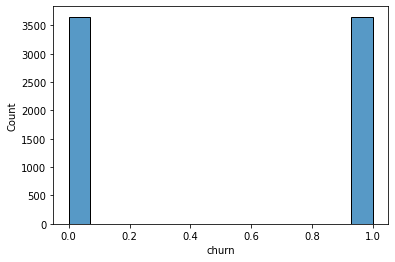

In [29]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
sns.histplot(y_over)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33, random_state=1)

start = time.time()
clf = CatBoostClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('CatBoost GBM. Oversampling', y_test, y_preds)

Learning rate set to 0.020295
0:	learn: 0.6780282	total: 7.2ms	remaining: 7.19s
1:	learn: 0.6631566	total: 15.7ms	remaining: 7.82s
2:	learn: 0.6511498	total: 29.4ms	remaining: 9.76s
3:	learn: 0.6385839	total: 37.3ms	remaining: 9.29s
4:	learn: 0.6258887	total: 44.5ms	remaining: 8.85s
5:	learn: 0.6151790	total: 50.2ms	remaining: 8.31s
6:	learn: 0.6042540	total: 56.1ms	remaining: 7.96s
7:	learn: 0.5925824	total: 62.4ms	remaining: 7.74s
8:	learn: 0.5804725	total: 66.5ms	remaining: 7.32s
9:	learn: 0.5709657	total: 74.8ms	remaining: 7.41s
10:	learn: 0.5608278	total: 81ms	remaining: 7.28s
11:	learn: 0.5540417	total: 85.6ms	remaining: 7.04s
12:	learn: 0.5460259	total: 89.7ms	remaining: 6.81s
13:	learn: 0.5373121	total: 94.5ms	remaining: 6.66s
14:	learn: 0.5298040	total: 99ms	remaining: 6.5s
15:	learn: 0.5220757	total: 103ms	remaining: 6.35s
16:	learn: 0.5134349	total: 107ms	remaining: 6.2s
17:	learn: 0.5062694	total: 111ms	remaining: 6.08s
18:	learn: 0.5006761	total: 116ms	remaining: 5.97s
19:

188:	learn: 0.2484720	total: 975ms	remaining: 4.18s
189:	learn: 0.2479982	total: 981ms	remaining: 4.18s
190:	learn: 0.2473007	total: 986ms	remaining: 4.17s
191:	learn: 0.2468043	total: 990ms	remaining: 4.17s
192:	learn: 0.2460488	total: 994ms	remaining: 4.16s
193:	learn: 0.2454998	total: 996ms	remaining: 4.14s
194:	learn: 0.2451464	total: 998ms	remaining: 4.12s
195:	learn: 0.2448079	total: 1s	remaining: 4.1s
196:	learn: 0.2444527	total: 1s	remaining: 4.09s
197:	learn: 0.2438804	total: 1s	remaining: 4.07s
198:	learn: 0.2434801	total: 1.01s	remaining: 4.06s
199:	learn: 0.2431226	total: 1.01s	remaining: 4.05s
200:	learn: 0.2427260	total: 1.02s	remaining: 4.04s
201:	learn: 0.2420371	total: 1.02s	remaining: 4.03s
202:	learn: 0.2416996	total: 1.02s	remaining: 4.02s
203:	learn: 0.2411794	total: 1.03s	remaining: 4.01s
204:	learn: 0.2409190	total: 1.03s	remaining: 4.01s
205:	learn: 0.2406561	total: 1.04s	remaining: 4s
206:	learn: 0.2403860	total: 1.04s	remaining: 3.99s
207:	learn: 0.2402740	tot

383:	learn: 0.1812170	total: 1.76s	remaining: 2.83s
384:	learn: 0.1810251	total: 1.77s	remaining: 2.83s
385:	learn: 0.1805964	total: 1.77s	remaining: 2.82s
386:	learn: 0.1803443	total: 1.78s	remaining: 2.82s
387:	learn: 0.1798921	total: 1.79s	remaining: 2.82s
388:	learn: 0.1794207	total: 1.79s	remaining: 2.81s
389:	learn: 0.1790795	total: 1.8s	remaining: 2.81s
390:	learn: 0.1787327	total: 1.81s	remaining: 2.81s
391:	learn: 0.1784906	total: 1.81s	remaining: 2.81s
392:	learn: 0.1781298	total: 1.82s	remaining: 2.81s
393:	learn: 0.1778103	total: 1.82s	remaining: 2.8s
394:	learn: 0.1774667	total: 1.83s	remaining: 2.8s
395:	learn: 0.1769553	total: 1.83s	remaining: 2.8s
396:	learn: 0.1766885	total: 1.84s	remaining: 2.8s
397:	learn: 0.1764495	total: 1.85s	remaining: 2.79s
398:	learn: 0.1762568	total: 1.85s	remaining: 2.79s
399:	learn: 0.1760277	total: 1.86s	remaining: 2.79s
400:	learn: 0.1757787	total: 1.87s	remaining: 2.79s
401:	learn: 0.1753149	total: 1.87s	remaining: 2.78s
402:	learn: 0.174

542:	learn: 0.1401109	total: 2.74s	remaining: 2.31s
543:	learn: 0.1399178	total: 2.75s	remaining: 2.3s
544:	learn: 0.1398759	total: 2.75s	remaining: 2.3s
545:	learn: 0.1396138	total: 2.76s	remaining: 2.29s
546:	learn: 0.1392776	total: 2.76s	remaining: 2.29s
547:	learn: 0.1389962	total: 2.77s	remaining: 2.28s
548:	learn: 0.1387046	total: 2.77s	remaining: 2.27s
549:	learn: 0.1384951	total: 2.77s	remaining: 2.27s
550:	learn: 0.1383370	total: 2.77s	remaining: 2.26s
551:	learn: 0.1381678	total: 2.77s	remaining: 2.25s
552:	learn: 0.1380061	total: 2.78s	remaining: 2.25s
553:	learn: 0.1378494	total: 2.78s	remaining: 2.24s
554:	learn: 0.1377380	total: 2.78s	remaining: 2.23s
555:	learn: 0.1374621	total: 2.79s	remaining: 2.23s
556:	learn: 0.1371892	total: 2.79s	remaining: 2.22s
557:	learn: 0.1370939	total: 2.79s	remaining: 2.21s
558:	learn: 0.1369709	total: 2.8s	remaining: 2.21s
559:	learn: 0.1368004	total: 2.8s	remaining: 2.2s
560:	learn: 0.1366148	total: 2.8s	remaining: 2.19s
561:	learn: 0.1362

747:	learn: 0.1015513	total: 3.52s	remaining: 1.19s
748:	learn: 0.1013363	total: 3.54s	remaining: 1.19s
749:	learn: 0.1011522	total: 3.54s	remaining: 1.18s
750:	learn: 0.1010959	total: 3.55s	remaining: 1.18s
751:	learn: 0.1010061	total: 3.55s	remaining: 1.17s
752:	learn: 0.1008363	total: 3.56s	remaining: 1.17s
753:	learn: 0.1006472	total: 3.56s	remaining: 1.16s
754:	learn: 0.1005262	total: 3.56s	remaining: 1.16s
755:	learn: 0.1003510	total: 3.57s	remaining: 1.15s
756:	learn: 0.1001946	total: 3.57s	remaining: 1.15s
757:	learn: 0.0999692	total: 3.58s	remaining: 1.14s
758:	learn: 0.0998635	total: 3.59s	remaining: 1.14s
759:	learn: 0.0997545	total: 3.59s	remaining: 1.13s
760:	learn: 0.0996309	total: 3.6s	remaining: 1.13s
761:	learn: 0.0993995	total: 3.6s	remaining: 1.12s
762:	learn: 0.0992933	total: 3.6s	remaining: 1.12s
763:	learn: 0.0991421	total: 3.61s	remaining: 1.11s
764:	learn: 0.0989291	total: 3.61s	remaining: 1.11s
765:	learn: 0.0986966	total: 3.61s	remaining: 1.1s
766:	learn: 0.09

946:	learn: 0.0755632	total: 4.31s	remaining: 241ms
947:	learn: 0.0754748	total: 4.31s	remaining: 237ms
948:	learn: 0.0753320	total: 4.32s	remaining: 232ms
949:	learn: 0.0752200	total: 4.32s	remaining: 228ms
950:	learn: 0.0750644	total: 4.33s	remaining: 223ms
951:	learn: 0.0749769	total: 4.33s	remaining: 218ms
952:	learn: 0.0748501	total: 4.33s	remaining: 214ms
953:	learn: 0.0747515	total: 4.34s	remaining: 209ms
954:	learn: 0.0746614	total: 4.34s	remaining: 205ms
955:	learn: 0.0745213	total: 4.34s	remaining: 200ms
956:	learn: 0.0743655	total: 4.35s	remaining: 195ms
957:	learn: 0.0742609	total: 4.35s	remaining: 191ms
958:	learn: 0.0741692	total: 4.36s	remaining: 186ms
959:	learn: 0.0740350	total: 4.36s	remaining: 182ms
960:	learn: 0.0739690	total: 4.37s	remaining: 177ms
961:	learn: 0.0739053	total: 4.37s	remaining: 173ms
962:	learn: 0.0738203	total: 4.37s	remaining: 168ms
963:	learn: 0.0737161	total: 4.38s	remaining: 163ms
964:	learn: 0.0735933	total: 4.38s	remaining: 159ms
965:	learn: 

also we can give categorical features which will improve results - we will do this later

### Undersampling

<AxesSubplot:xlabel='churn', ylabel='Count'>

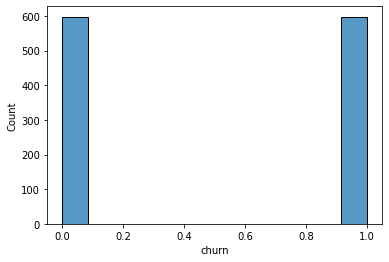

In [31]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
sns.histplot(y_under)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.33, random_state=1)

start = time.time()
clf = CatBoostClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('CatBoost GBM. Undersampling', y_test, y_preds)

Learning rate set to 0.009371
0:	learn: 0.6870269	total: 2.14ms	remaining: 2.14s
1:	learn: 0.6805507	total: 4.18ms	remaining: 2.08s
2:	learn: 0.6742764	total: 6.16ms	remaining: 2.05s
3:	learn: 0.6678889	total: 8.26ms	remaining: 2.06s
4:	learn: 0.6626162	total: 10.4ms	remaining: 2.08s
5:	learn: 0.6568586	total: 12.6ms	remaining: 2.09s
6:	learn: 0.6515452	total: 15.2ms	remaining: 2.15s
7:	learn: 0.6461065	total: 17.8ms	remaining: 2.2s
8:	learn: 0.6417008	total: 22ms	remaining: 2.42s
9:	learn: 0.6361796	total: 24.3ms	remaining: 2.41s
10:	learn: 0.6305967	total: 26.8ms	remaining: 2.41s
11:	learn: 0.6254935	total: 29.4ms	remaining: 2.42s
12:	learn: 0.6206820	total: 31.5ms	remaining: 2.39s
13:	learn: 0.6165264	total: 32.9ms	remaining: 2.31s
14:	learn: 0.6115194	total: 34.9ms	remaining: 2.29s
15:	learn: 0.6068004	total: 36.5ms	remaining: 2.25s
16:	learn: 0.6022841	total: 37.9ms	remaining: 2.19s
17:	learn: 0.5969233	total: 39.2ms	remaining: 2.14s
18:	learn: 0.5929766	total: 40.5ms	remaining: 2

207:	learn: 0.3174855	total: 364ms	remaining: 1.39s
208:	learn: 0.3169466	total: 366ms	remaining: 1.38s
209:	learn: 0.3165912	total: 368ms	remaining: 1.38s
210:	learn: 0.3159420	total: 369ms	remaining: 1.38s
211:	learn: 0.3157560	total: 372ms	remaining: 1.38s
212:	learn: 0.3152314	total: 374ms	remaining: 1.38s
213:	learn: 0.3147325	total: 375ms	remaining: 1.38s
214:	learn: 0.3141595	total: 377ms	remaining: 1.37s
215:	learn: 0.3136993	total: 378ms	remaining: 1.37s
216:	learn: 0.3132945	total: 381ms	remaining: 1.37s
217:	learn: 0.3129560	total: 383ms	remaining: 1.37s
218:	learn: 0.3126200	total: 385ms	remaining: 1.37s
219:	learn: 0.3124743	total: 387ms	remaining: 1.37s
220:	learn: 0.3118410	total: 389ms	remaining: 1.37s
221:	learn: 0.3111209	total: 391ms	remaining: 1.37s
222:	learn: 0.3105669	total: 393ms	remaining: 1.37s
223:	learn: 0.3100581	total: 394ms	remaining: 1.36s
224:	learn: 0.3097483	total: 395ms	remaining: 1.36s
225:	learn: 0.3091299	total: 396ms	remaining: 1.36s
226:	learn: 

462:	learn: 0.2410284	total: 730ms	remaining: 847ms
463:	learn: 0.2407557	total: 732ms	remaining: 846ms
464:	learn: 0.2406155	total: 734ms	remaining: 845ms
465:	learn: 0.2404523	total: 736ms	remaining: 843ms
466:	learn: 0.2403300	total: 737ms	remaining: 842ms
467:	learn: 0.2401938	total: 739ms	remaining: 840ms
468:	learn: 0.2398520	total: 741ms	remaining: 839ms
469:	learn: 0.2396638	total: 743ms	remaining: 838ms
470:	learn: 0.2393341	total: 744ms	remaining: 836ms
471:	learn: 0.2392008	total: 746ms	remaining: 835ms
472:	learn: 0.2390357	total: 748ms	remaining: 833ms
473:	learn: 0.2387987	total: 750ms	remaining: 832ms
474:	learn: 0.2386089	total: 751ms	remaining: 831ms
475:	learn: 0.2383816	total: 753ms	remaining: 829ms
476:	learn: 0.2379135	total: 754ms	remaining: 827ms
477:	learn: 0.2377416	total: 756ms	remaining: 825ms
478:	learn: 0.2375655	total: 757ms	remaining: 823ms
479:	learn: 0.2372947	total: 758ms	remaining: 821ms
480:	learn: 0.2371153	total: 759ms	remaining: 819ms
481:	learn: 

712:	learn: 0.1921183	total: 1.1s	remaining: 442ms
713:	learn: 0.1918763	total: 1.1s	remaining: 440ms
714:	learn: 0.1917176	total: 1.1s	remaining: 438ms
715:	learn: 0.1914819	total: 1.1s	remaining: 437ms
716:	learn: 0.1913262	total: 1.1s	remaining: 436ms
717:	learn: 0.1911896	total: 1.1s	remaining: 434ms
718:	learn: 0.1910437	total: 1.11s	remaining: 433ms
719:	learn: 0.1908056	total: 1.11s	remaining: 431ms
720:	learn: 0.1906406	total: 1.11s	remaining: 430ms
721:	learn: 0.1906052	total: 1.11s	remaining: 428ms
722:	learn: 0.1905046	total: 1.11s	remaining: 427ms
723:	learn: 0.1904730	total: 1.11s	remaining: 425ms
724:	learn: 0.1904300	total: 1.12s	remaining: 424ms
725:	learn: 0.1901856	total: 1.12s	remaining: 422ms
726:	learn: 0.1900794	total: 1.12s	remaining: 421ms
727:	learn: 0.1898848	total: 1.12s	remaining: 419ms
728:	learn: 0.1897416	total: 1.12s	remaining: 418ms
729:	learn: 0.1894848	total: 1.12s	remaining: 416ms
730:	learn: 0.1893202	total: 1.13s	remaining: 414ms
731:	learn: 0.1890

916:	learn: 0.1576518	total: 1.46s	remaining: 132ms
917:	learn: 0.1574708	total: 1.46s	remaining: 131ms
918:	learn: 0.1571769	total: 1.47s	remaining: 129ms
919:	learn: 0.1570454	total: 1.47s	remaining: 128ms
920:	learn: 0.1569319	total: 1.47s	remaining: 126ms
921:	learn: 0.1567925	total: 1.48s	remaining: 125ms
922:	learn: 0.1565325	total: 1.48s	remaining: 123ms
923:	learn: 0.1563996	total: 1.48s	remaining: 122ms
924:	learn: 0.1563576	total: 1.48s	remaining: 120ms
925:	learn: 0.1561808	total: 1.49s	remaining: 119ms
926:	learn: 0.1561488	total: 1.49s	remaining: 117ms
927:	learn: 0.1560487	total: 1.49s	remaining: 116ms
928:	learn: 0.1558179	total: 1.49s	remaining: 114ms
929:	learn: 0.1555563	total: 1.5s	remaining: 113ms
930:	learn: 0.1553254	total: 1.5s	remaining: 111ms
931:	learn: 0.1552092	total: 1.5s	remaining: 109ms
932:	learn: 0.1548872	total: 1.5s	remaining: 108ms
933:	learn: 0.1545988	total: 1.5s	remaining: 106ms
934:	learn: 0.1544176	total: 1.51s	remaining: 105ms
935:	learn: 0.154

### SMOTE

<AxesSubplot:xlabel='churn', ylabel='Count'>

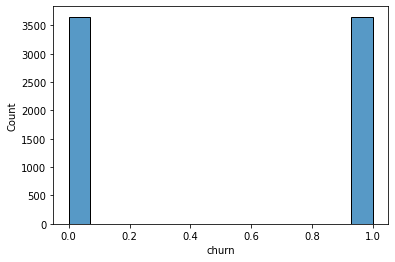

In [33]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
sns.histplot(y_smote)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.33, random_state=1)

start = time.time()
clf = CatBoostClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('CatBoost GBM. SMOTE', y_test, y_preds)

Learning rate set to 0.020295
0:	learn: 0.6821046	total: 6.54ms	remaining: 6.53s
1:	learn: 0.6723925	total: 19.1ms	remaining: 9.52s
2:	learn: 0.6614642	total: 25.9ms	remaining: 8.59s
3:	learn: 0.6496200	total: 31.6ms	remaining: 7.87s
4:	learn: 0.6382535	total: 37.6ms	remaining: 7.48s
5:	learn: 0.6304883	total: 47.2ms	remaining: 7.83s
6:	learn: 0.6211350	total: 56.1ms	remaining: 7.96s
7:	learn: 0.6122052	total: 65.2ms	remaining: 8.09s
8:	learn: 0.6055749	total: 72.6ms	remaining: 7.99s
9:	learn: 0.5969041	total: 78.8ms	remaining: 7.8s
10:	learn: 0.5887193	total: 83.8ms	remaining: 7.54s
11:	learn: 0.5832716	total: 91.5ms	remaining: 7.53s
12:	learn: 0.5773473	total: 99.3ms	remaining: 7.54s
13:	learn: 0.5707046	total: 107ms	remaining: 7.54s
14:	learn: 0.5643237	total: 114ms	remaining: 7.5s
15:	learn: 0.5588707	total: 120ms	remaining: 7.35s
16:	learn: 0.5534300	total: 124ms	remaining: 7.17s
17:	learn: 0.5489286	total: 128ms	remaining: 6.98s
18:	learn: 0.5431975	total: 131ms	remaining: 6.77s


187:	learn: 0.3196264	total: 776ms	remaining: 3.35s
188:	learn: 0.3190194	total: 782ms	remaining: 3.35s
189:	learn: 0.3185496	total: 787ms	remaining: 3.35s
190:	learn: 0.3181459	total: 791ms	remaining: 3.35s
191:	learn: 0.3177239	total: 795ms	remaining: 3.35s
192:	learn: 0.3170876	total: 799ms	remaining: 3.34s
193:	learn: 0.3166221	total: 803ms	remaining: 3.33s
194:	learn: 0.3160281	total: 805ms	remaining: 3.32s
195:	learn: 0.3155282	total: 808ms	remaining: 3.31s
196:	learn: 0.3149360	total: 810ms	remaining: 3.3s
197:	learn: 0.3143443	total: 812ms	remaining: 3.29s
198:	learn: 0.3136376	total: 815ms	remaining: 3.28s
199:	learn: 0.3133651	total: 817ms	remaining: 3.27s
200:	learn: 0.3128771	total: 819ms	remaining: 3.26s
201:	learn: 0.3125887	total: 823ms	remaining: 3.25s
202:	learn: 0.3120999	total: 827ms	remaining: 3.25s
203:	learn: 0.3115931	total: 831ms	remaining: 3.24s
204:	learn: 0.3112757	total: 834ms	remaining: 3.23s
205:	learn: 0.3111079	total: 836ms	remaining: 3.22s
206:	learn: 0

366:	learn: 0.2607105	total: 1.35s	remaining: 2.33s
367:	learn: 0.2604748	total: 1.36s	remaining: 2.33s
368:	learn: 0.2602304	total: 1.36s	remaining: 2.33s
369:	learn: 0.2600300	total: 1.36s	remaining: 2.32s
370:	learn: 0.2598409	total: 1.37s	remaining: 2.32s
371:	learn: 0.2593114	total: 1.37s	remaining: 2.32s
372:	learn: 0.2590407	total: 1.38s	remaining: 2.31s
373:	learn: 0.2587560	total: 1.38s	remaining: 2.31s
374:	learn: 0.2585610	total: 1.38s	remaining: 2.31s
375:	learn: 0.2583923	total: 1.39s	remaining: 2.3s
376:	learn: 0.2579507	total: 1.39s	remaining: 2.3s
377:	learn: 0.2575003	total: 1.4s	remaining: 2.3s
378:	learn: 0.2571201	total: 1.4s	remaining: 2.3s
379:	learn: 0.2566713	total: 1.41s	remaining: 2.29s
380:	learn: 0.2564891	total: 1.41s	remaining: 2.29s
381:	learn: 0.2562794	total: 1.41s	remaining: 2.28s
382:	learn: 0.2560175	total: 1.41s	remaining: 2.28s
383:	learn: 0.2555849	total: 1.42s	remaining: 2.27s
384:	learn: 0.2553055	total: 1.42s	remaining: 2.27s
385:	learn: 0.2549

578:	learn: 0.2055141	total: 2.52s	remaining: 1.83s
579:	learn: 0.2051882	total: 2.53s	remaining: 1.83s
580:	learn: 0.2050170	total: 2.53s	remaining: 1.83s
581:	learn: 0.2048533	total: 2.54s	remaining: 1.82s
582:	learn: 0.2046437	total: 2.54s	remaining: 1.82s
583:	learn: 0.2044306	total: 2.55s	remaining: 1.81s
584:	learn: 0.2042229	total: 2.55s	remaining: 1.81s
585:	learn: 0.2041649	total: 2.56s	remaining: 1.81s
586:	learn: 0.2039494	total: 2.56s	remaining: 1.8s
587:	learn: 0.2037737	total: 2.56s	remaining: 1.79s
588:	learn: 0.2035365	total: 2.56s	remaining: 1.79s
589:	learn: 0.2032532	total: 2.57s	remaining: 1.78s
590:	learn: 0.2028902	total: 2.57s	remaining: 1.78s
591:	learn: 0.2025942	total: 2.57s	remaining: 1.77s
592:	learn: 0.2022368	total: 2.57s	remaining: 1.76s
593:	learn: 0.2019969	total: 2.58s	remaining: 1.76s
594:	learn: 0.2017085	total: 2.58s	remaining: 1.76s
595:	learn: 0.2014057	total: 2.58s	remaining: 1.75s
596:	learn: 0.2012081	total: 2.59s	remaining: 1.75s
597:	learn: 0

746:	learn: 0.1748256	total: 3.1s	remaining: 1.05s
747:	learn: 0.1747094	total: 3.11s	remaining: 1.05s
748:	learn: 0.1745720	total: 3.11s	remaining: 1.04s
749:	learn: 0.1744051	total: 3.12s	remaining: 1.04s
750:	learn: 0.1743135	total: 3.12s	remaining: 1.03s
751:	learn: 0.1741082	total: 3.13s	remaining: 1.03s
752:	learn: 0.1739936	total: 3.13s	remaining: 1.03s
753:	learn: 0.1737902	total: 3.13s	remaining: 1.02s
754:	learn: 0.1735952	total: 3.14s	remaining: 1.02s
755:	learn: 0.1735883	total: 3.14s	remaining: 1.01s
756:	learn: 0.1735238	total: 3.14s	remaining: 1.01s
757:	learn: 0.1733115	total: 3.14s	remaining: 1s
758:	learn: 0.1731764	total: 3.15s	remaining: 999ms
759:	learn: 0.1731675	total: 3.15s	remaining: 995ms
760:	learn: 0.1729887	total: 3.15s	remaining: 991ms
761:	learn: 0.1727100	total: 3.16s	remaining: 987ms
762:	learn: 0.1725754	total: 3.16s	remaining: 982ms
763:	learn: 0.1724495	total: 3.17s	remaining: 978ms
764:	learn: 0.1722857	total: 3.17s	remaining: 974ms
765:	learn: 0.17

917:	learn: 0.1498036	total: 3.68s	remaining: 329ms
918:	learn: 0.1496608	total: 3.69s	remaining: 325ms
919:	learn: 0.1494196	total: 3.69s	remaining: 321ms
920:	learn: 0.1492339	total: 3.7s	remaining: 317ms
921:	learn: 0.1492282	total: 3.7s	remaining: 313ms
922:	learn: 0.1490745	total: 3.71s	remaining: 309ms
923:	learn: 0.1490574	total: 3.71s	remaining: 305ms
924:	learn: 0.1488991	total: 3.71s	remaining: 301ms
925:	learn: 0.1487917	total: 3.71s	remaining: 297ms
926:	learn: 0.1486128	total: 3.72s	remaining: 293ms
927:	learn: 0.1484427	total: 3.72s	remaining: 289ms
928:	learn: 0.1482239	total: 3.72s	remaining: 285ms
929:	learn: 0.1480971	total: 3.73s	remaining: 281ms
930:	learn: 0.1479518	total: 3.73s	remaining: 277ms
931:	learn: 0.1478126	total: 3.73s	remaining: 273ms
932:	learn: 0.1477154	total: 3.74s	remaining: 269ms
933:	learn: 0.1476046	total: 3.74s	remaining: 265ms
934:	learn: 0.1473967	total: 3.75s	remaining: 261ms
935:	learn: 0.1472579	total: 3.75s	remaining: 257ms
936:	learn: 0.

### With categorical features 

In [35]:
columns = ['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'number_customer_service_calls'
]
X = data[columns]
y = data['churn']
categorical_features = ['state', 'area_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

start = time.time()
clf = CatBoostClassifier(random_state=1)
clf = clf.fit(X_train, y_train, categorical_features)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('CatBoost GBM. With categorical features', y_test, y_preds)

Learning rate set to 0.016105
0:	learn: 0.6776054	total: 9.54ms	remaining: 9.53s
1:	learn: 0.6614211	total: 15.2ms	remaining: 7.56s
2:	learn: 0.6456966	total: 18.7ms	remaining: 6.21s
3:	learn: 0.6275246	total: 22.2ms	remaining: 5.52s
4:	learn: 0.6177184	total: 24.2ms	remaining: 4.81s
5:	learn: 0.6033696	total: 30.7ms	remaining: 5.09s
6:	learn: 0.5906937	total: 39.3ms	remaining: 5.57s
7:	learn: 0.5833041	total: 42ms	remaining: 5.21s
8:	learn: 0.5700778	total: 50.7ms	remaining: 5.58s
9:	learn: 0.5596668	total: 58.7ms	remaining: 5.81s
10:	learn: 0.5485754	total: 63.5ms	remaining: 5.71s
11:	learn: 0.5346275	total: 68ms	remaining: 5.6s
12:	learn: 0.5249169	total: 71.5ms	remaining: 5.43s
13:	learn: 0.5182901	total: 73.3ms	remaining: 5.16s
14:	learn: 0.5091417	total: 78.9ms	remaining: 5.18s
15:	learn: 0.5039896	total: 82ms	remaining: 5.04s
16:	learn: 0.4948815	total: 89.6ms	remaining: 5.18s
17:	learn: 0.4827534	total: 97.9ms	remaining: 5.34s
18:	learn: 0.4730659	total: 105ms	remaining: 5.41s


193:	learn: 0.1613693	total: 1.18s	remaining: 4.92s
194:	learn: 0.1610732	total: 1.19s	remaining: 4.91s
195:	learn: 0.1606443	total: 1.2s	remaining: 4.92s
196:	learn: 0.1601431	total: 1.21s	remaining: 4.92s
197:	learn: 0.1598633	total: 1.21s	remaining: 4.91s
198:	learn: 0.1595721	total: 1.22s	remaining: 4.92s
199:	learn: 0.1593307	total: 1.23s	remaining: 4.91s
200:	learn: 0.1589996	total: 1.24s	remaining: 4.91s
201:	learn: 0.1587615	total: 1.24s	remaining: 4.9s
202:	learn: 0.1584084	total: 1.25s	remaining: 4.9s
203:	learn: 0.1580368	total: 1.25s	remaining: 4.9s
204:	learn: 0.1577897	total: 1.26s	remaining: 4.9s
205:	learn: 0.1574954	total: 1.27s	remaining: 4.9s
206:	learn: 0.1571075	total: 1.27s	remaining: 4.88s
207:	learn: 0.1568000	total: 1.28s	remaining: 4.87s
208:	learn: 0.1564224	total: 1.28s	remaining: 4.86s
209:	learn: 0.1559850	total: 1.29s	remaining: 4.84s
210:	learn: 0.1556543	total: 1.29s	remaining: 4.83s
211:	learn: 0.1553526	total: 1.3s	remaining: 4.82s
212:	learn: 0.15514

364:	learn: 0.1293354	total: 2.38s	remaining: 4.14s
365:	learn: 0.1291766	total: 2.39s	remaining: 4.14s
366:	learn: 0.1290611	total: 2.4s	remaining: 4.13s
367:	learn: 0.1289646	total: 2.41s	remaining: 4.13s
368:	learn: 0.1288704	total: 2.42s	remaining: 4.13s
369:	learn: 0.1287271	total: 2.42s	remaining: 4.13s
370:	learn: 0.1284810	total: 2.43s	remaining: 4.12s
371:	learn: 0.1284774	total: 2.44s	remaining: 4.11s
372:	learn: 0.1283797	total: 2.44s	remaining: 4.1s
373:	learn: 0.1282670	total: 2.44s	remaining: 4.09s
374:	learn: 0.1281263	total: 2.45s	remaining: 4.09s
375:	learn: 0.1280388	total: 2.46s	remaining: 4.08s
376:	learn: 0.1279999	total: 2.47s	remaining: 4.08s
377:	learn: 0.1278155	total: 2.48s	remaining: 4.08s
378:	learn: 0.1277284	total: 2.48s	remaining: 4.07s
379:	learn: 0.1275871	total: 2.49s	remaining: 4.06s
380:	learn: 0.1274943	total: 2.49s	remaining: 4.05s
381:	learn: 0.1273998	total: 2.5s	remaining: 4.04s
382:	learn: 0.1272305	total: 2.5s	remaining: 4.04s
383:	learn: 0.12

530:	learn: 0.1119760	total: 3.37s	remaining: 2.97s
531:	learn: 0.1118429	total: 3.38s	remaining: 2.97s
532:	learn: 0.1118164	total: 3.38s	remaining: 2.96s
533:	learn: 0.1117173	total: 3.39s	remaining: 2.96s
534:	learn: 0.1116069	total: 3.4s	remaining: 2.95s
535:	learn: 0.1114365	total: 3.4s	remaining: 2.94s
536:	learn: 0.1113352	total: 3.4s	remaining: 2.94s
537:	learn: 0.1112176	total: 3.41s	remaining: 2.93s
538:	learn: 0.1110496	total: 3.41s	remaining: 2.92s
539:	learn: 0.1109856	total: 3.42s	remaining: 2.91s
540:	learn: 0.1109427	total: 3.42s	remaining: 2.9s
541:	learn: 0.1109339	total: 3.42s	remaining: 2.89s
542:	learn: 0.1108840	total: 3.43s	remaining: 2.89s
543:	learn: 0.1108753	total: 3.43s	remaining: 2.88s
544:	learn: 0.1107566	total: 3.44s	remaining: 2.87s
545:	learn: 0.1107153	total: 3.44s	remaining: 2.86s
546:	learn: 0.1106635	total: 3.45s	remaining: 2.86s
547:	learn: 0.1106358	total: 3.45s	remaining: 2.85s
548:	learn: 0.1105483	total: 3.46s	remaining: 2.84s
549:	learn: 0.11

691:	learn: 0.0982664	total: 4.36s	remaining: 1.94s
692:	learn: 0.0982467	total: 4.37s	remaining: 1.94s
693:	learn: 0.0982155	total: 4.38s	remaining: 1.93s
694:	learn: 0.0981744	total: 4.38s	remaining: 1.92s
695:	learn: 0.0980821	total: 4.38s	remaining: 1.91s
696:	learn: 0.0979844	total: 4.39s	remaining: 1.91s
697:	learn: 0.0979361	total: 4.4s	remaining: 1.9s
698:	learn: 0.0979023	total: 4.4s	remaining: 1.9s
699:	learn: 0.0978557	total: 4.41s	remaining: 1.89s
700:	learn: 0.0978355	total: 4.42s	remaining: 1.88s
701:	learn: 0.0977477	total: 4.42s	remaining: 1.88s
702:	learn: 0.0976854	total: 4.43s	remaining: 1.87s
703:	learn: 0.0975486	total: 4.43s	remaining: 1.86s
704:	learn: 0.0974628	total: 4.44s	remaining: 1.86s
705:	learn: 0.0973298	total: 4.45s	remaining: 1.85s
706:	learn: 0.0972304	total: 4.45s	remaining: 1.85s
707:	learn: 0.0971571	total: 4.46s	remaining: 1.84s
708:	learn: 0.0971024	total: 4.47s	remaining: 1.83s
709:	learn: 0.0970825	total: 4.47s	remaining: 1.83s
710:	learn: 0.09

869:	learn: 0.0849202	total: 5.54s	remaining: 828ms
870:	learn: 0.0848136	total: 5.55s	remaining: 822ms
871:	learn: 0.0847734	total: 5.56s	remaining: 816ms
872:	learn: 0.0846822	total: 5.56s	remaining: 809ms
873:	learn: 0.0845843	total: 5.57s	remaining: 803ms
874:	learn: 0.0845526	total: 5.58s	remaining: 797ms
875:	learn: 0.0843718	total: 5.58s	remaining: 790ms
876:	learn: 0.0843550	total: 5.59s	remaining: 784ms
877:	learn: 0.0841917	total: 5.59s	remaining: 777ms
878:	learn: 0.0840499	total: 5.6s	remaining: 771ms
879:	learn: 0.0839999	total: 5.61s	remaining: 765ms
880:	learn: 0.0838918	total: 5.61s	remaining: 758ms
881:	learn: 0.0837996	total: 5.62s	remaining: 752ms
882:	learn: 0.0836924	total: 5.63s	remaining: 746ms
883:	learn: 0.0836308	total: 5.64s	remaining: 740ms
884:	learn: 0.0835440	total: 5.64s	remaining: 733ms
885:	learn: 0.0834379	total: 5.65s	remaining: 727ms
886:	learn: 0.0833221	total: 5.66s	remaining: 721ms
887:	learn: 0.0832074	total: 5.67s	remaining: 715ms
888:	learn: 0

### Cat Features with oversampling

<AxesSubplot:xlabel='churn', ylabel='Count'>

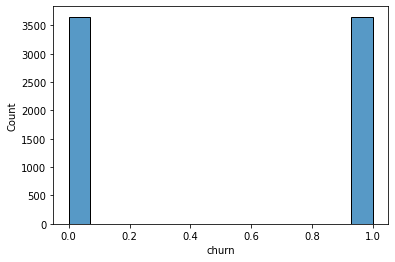

In [36]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
sns.histplot(y_over)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33, random_state=1)

start = time.time()
clf = CatBoostClassifier(random_state=1)
clf = clf.fit(X_train, y_train, categorical_features)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('CatBoost GBM. With categorical features + Oversampling', y_test, y_preds)

Learning rate set to 0.020295
0:	learn: 0.6785075	total: 8.73ms	remaining: 8.72s
1:	learn: 0.6650554	total: 19.7ms	remaining: 9.81s
2:	learn: 0.6533043	total: 28.8ms	remaining: 9.58s
3:	learn: 0.6425606	total: 35.8ms	remaining: 8.92s
4:	learn: 0.6318551	total: 43.2ms	remaining: 8.6s
5:	learn: 0.6214318	total: 52.8ms	remaining: 8.75s
6:	learn: 0.6106978	total: 60.7ms	remaining: 8.61s
7:	learn: 0.6027538	total: 67.7ms	remaining: 8.39s
8:	learn: 0.5942749	total: 73.8ms	remaining: 8.13s
9:	learn: 0.5840769	total: 81ms	remaining: 8.02s
10:	learn: 0.5748699	total: 86.7ms	remaining: 7.8s
11:	learn: 0.5678623	total: 91.9ms	remaining: 7.57s
12:	learn: 0.5598210	total: 97.9ms	remaining: 7.43s
13:	learn: 0.5507103	total: 104ms	remaining: 7.34s
14:	learn: 0.5422544	total: 111ms	remaining: 7.29s
15:	learn: 0.5338421	total: 118ms	remaining: 7.27s
16:	learn: 0.5266144	total: 125ms	remaining: 7.21s
17:	learn: 0.5194504	total: 131ms	remaining: 7.17s
18:	learn: 0.5115781	total: 137ms	remaining: 7.08s
19

160:	learn: 0.2642832	total: 1.2s	remaining: 6.25s
161:	learn: 0.2638007	total: 1.21s	remaining: 6.26s
162:	learn: 0.2635321	total: 1.22s	remaining: 6.26s
163:	learn: 0.2628545	total: 1.23s	remaining: 6.26s
164:	learn: 0.2621801	total: 1.23s	remaining: 6.24s
165:	learn: 0.2616364	total: 1.24s	remaining: 6.22s
166:	learn: 0.2611313	total: 1.24s	remaining: 6.2s
167:	learn: 0.2608177	total: 1.25s	remaining: 6.18s
168:	learn: 0.2604937	total: 1.26s	remaining: 6.18s
169:	learn: 0.2602129	total: 1.26s	remaining: 6.17s
170:	learn: 0.2597925	total: 1.27s	remaining: 6.18s
171:	learn: 0.2590269	total: 1.28s	remaining: 6.17s
172:	learn: 0.2589323	total: 1.29s	remaining: 6.15s
173:	learn: 0.2583379	total: 1.29s	remaining: 6.14s
174:	learn: 0.2578607	total: 1.3s	remaining: 6.15s
175:	learn: 0.2565774	total: 1.31s	remaining: 6.15s
176:	learn: 0.2561142	total: 1.32s	remaining: 6.16s
177:	learn: 0.2554153	total: 1.33s	remaining: 6.15s
178:	learn: 0.2550006	total: 1.34s	remaining: 6.14s
179:	learn: 0.2

330:	learn: 0.1904147	total: 3.04s	remaining: 6.15s
331:	learn: 0.1902411	total: 3.05s	remaining: 6.14s
332:	learn: 0.1901405	total: 3.06s	remaining: 6.13s
333:	learn: 0.1899016	total: 3.06s	remaining: 6.11s
334:	learn: 0.1897643	total: 3.07s	remaining: 6.1s
335:	learn: 0.1895331	total: 3.08s	remaining: 6.1s
336:	learn: 0.1893070	total: 3.09s	remaining: 6.08s
337:	learn: 0.1887964	total: 3.09s	remaining: 6.06s
338:	learn: 0.1886703	total: 3.1s	remaining: 6.04s
339:	learn: 0.1884744	total: 3.11s	remaining: 6.03s
340:	learn: 0.1882331	total: 3.12s	remaining: 6.02s
341:	learn: 0.1879968	total: 3.13s	remaining: 6.03s
342:	learn: 0.1876249	total: 3.14s	remaining: 6.01s
343:	learn: 0.1874538	total: 3.15s	remaining: 6s
344:	learn: 0.1872174	total: 3.15s	remaining: 5.99s
345:	learn: 0.1869382	total: 3.16s	remaining: 5.98s
346:	learn: 0.1867401	total: 3.17s	remaining: 5.97s
347:	learn: 0.1865040	total: 3.18s	remaining: 5.96s
348:	learn: 0.1861414	total: 3.19s	remaining: 5.94s
349:	learn: 0.1859

498:	learn: 0.1468876	total: 4.23s	remaining: 4.25s
499:	learn: 0.1464774	total: 4.24s	remaining: 4.24s
500:	learn: 0.1462498	total: 4.25s	remaining: 4.23s
501:	learn: 0.1459682	total: 4.25s	remaining: 4.22s
502:	learn: 0.1458292	total: 4.26s	remaining: 4.21s
503:	learn: 0.1456999	total: 4.26s	remaining: 4.19s
504:	learn: 0.1455063	total: 4.26s	remaining: 4.18s
505:	learn: 0.1450618	total: 4.27s	remaining: 4.17s
506:	learn: 0.1447518	total: 4.28s	remaining: 4.16s
507:	learn: 0.1445352	total: 4.28s	remaining: 4.15s
508:	learn: 0.1444691	total: 4.29s	remaining: 4.14s
509:	learn: 0.1442455	total: 4.29s	remaining: 4.13s
510:	learn: 0.1439622	total: 4.3s	remaining: 4.11s
511:	learn: 0.1436806	total: 4.3s	remaining: 4.1s
512:	learn: 0.1435338	total: 4.31s	remaining: 4.09s
513:	learn: 0.1433051	total: 4.31s	remaining: 4.08s
514:	learn: 0.1430848	total: 4.32s	remaining: 4.07s
515:	learn: 0.1429414	total: 4.32s	remaining: 4.05s
516:	learn: 0.1424813	total: 4.33s	remaining: 4.04s
517:	learn: 0.1

670:	learn: 0.1080561	total: 5.23s	remaining: 2.56s
671:	learn: 0.1077640	total: 5.24s	remaining: 2.56s
672:	learn: 0.1076596	total: 5.24s	remaining: 2.55s
673:	learn: 0.1074826	total: 5.25s	remaining: 2.54s
674:	learn: 0.1073773	total: 5.25s	remaining: 2.53s
675:	learn: 0.1072294	total: 5.26s	remaining: 2.52s
676:	learn: 0.1070506	total: 5.27s	remaining: 2.51s
677:	learn: 0.1068954	total: 5.27s	remaining: 2.5s
678:	learn: 0.1067680	total: 5.28s	remaining: 2.49s
679:	learn: 0.1065363	total: 5.28s	remaining: 2.48s
680:	learn: 0.1062388	total: 5.29s	remaining: 2.48s
681:	learn: 0.1062135	total: 5.29s	remaining: 2.47s
682:	learn: 0.1061355	total: 5.3s	remaining: 2.46s
683:	learn: 0.1060444	total: 5.3s	remaining: 2.45s
684:	learn: 0.1057685	total: 5.31s	remaining: 2.44s
685:	learn: 0.1055838	total: 5.32s	remaining: 2.43s
686:	learn: 0.1053005	total: 5.32s	remaining: 2.42s
687:	learn: 0.1051726	total: 5.33s	remaining: 2.42s
688:	learn: 0.1050106	total: 5.33s	remaining: 2.41s
689:	learn: 0.1

833:	learn: 0.0832822	total: 6.22s	remaining: 1.24s
834:	learn: 0.0831191	total: 6.22s	remaining: 1.23s
835:	learn: 0.0830212	total: 6.23s	remaining: 1.22s
836:	learn: 0.0829102	total: 6.24s	remaining: 1.21s
837:	learn: 0.0827830	total: 6.24s	remaining: 1.21s
838:	learn: 0.0826247	total: 6.25s	remaining: 1.2s
839:	learn: 0.0825105	total: 6.25s	remaining: 1.19s
840:	learn: 0.0823384	total: 6.26s	remaining: 1.18s
841:	learn: 0.0822020	total: 6.27s	remaining: 1.18s
842:	learn: 0.0820341	total: 6.27s	remaining: 1.17s
843:	learn: 0.0819368	total: 6.29s	remaining: 1.16s
844:	learn: 0.0817758	total: 6.29s	remaining: 1.15s
845:	learn: 0.0816584	total: 6.3s	remaining: 1.15s
846:	learn: 0.0814978	total: 6.31s	remaining: 1.14s
847:	learn: 0.0813617	total: 6.32s	remaining: 1.13s
848:	learn: 0.0812294	total: 6.33s	remaining: 1.13s
849:	learn: 0.0811700	total: 6.34s	remaining: 1.12s
850:	learn: 0.0810981	total: 6.34s	remaining: 1.11s
851:	learn: 0.0809319	total: 6.35s	remaining: 1.1s
852:	learn: 0.0

### Cat features with Undersampling

<AxesSubplot:xlabel='churn', ylabel='Count'>

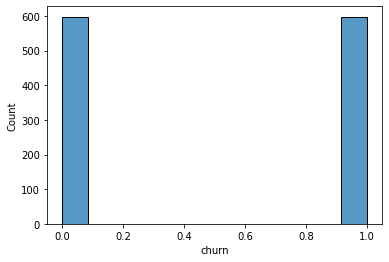

In [38]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
sns.histplot(y_under)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.33, random_state=1)

start = time.time()
clf = CatBoostClassifier(random_state=1)
clf = clf.fit(X_train, y_train, categorical_features)
y_preds = clf.predict(X_test)
finish = time.time()    
    
# print results
print_scores('CatBoost GBM. With categorical features + Undersampling', y_test, y_preds)

Learning rate set to 0.009371
0:	learn: 0.6873217	total: 3.69ms	remaining: 3.69s
1:	learn: 0.6814567	total: 11.2ms	remaining: 5.59s
2:	learn: 0.6760962	total: 17.5ms	remaining: 5.83s
3:	learn: 0.6713038	total: 21.5ms	remaining: 5.35s
4:	learn: 0.6649476	total: 29.6ms	remaining: 5.88s
5:	learn: 0.6609762	total: 34.3ms	remaining: 5.67s
6:	learn: 0.6562935	total: 39.4ms	remaining: 5.59s
7:	learn: 0.6518396	total: 42.9ms	remaining: 5.32s
8:	learn: 0.6461641	total: 47ms	remaining: 5.17s
9:	learn: 0.6405250	total: 50.3ms	remaining: 4.98s
10:	learn: 0.6361914	total: 54.1ms	remaining: 4.86s
11:	learn: 0.6317165	total: 59.7ms	remaining: 4.91s
12:	learn: 0.6293987	total: 63.2ms	remaining: 4.8s
13:	learn: 0.6242907	total: 67.3ms	remaining: 4.74s
14:	learn: 0.6197245	total: 71.4ms	remaining: 4.69s
15:	learn: 0.6164206	total: 75ms	remaining: 4.61s
16:	learn: 0.6125117	total: 81.3ms	remaining: 4.7s
17:	learn: 0.6082002	total: 85.6ms	remaining: 4.67s
18:	learn: 0.6038399	total: 89.5ms	remaining: 4.62

187:	learn: 0.3553201	total: 771ms	remaining: 3.33s
188:	learn: 0.3547268	total: 775ms	remaining: 3.33s
189:	learn: 0.3546745	total: 778ms	remaining: 3.31s
190:	learn: 0.3544101	total: 782ms	remaining: 3.31s
191:	learn: 0.3536016	total: 786ms	remaining: 3.31s
192:	learn: 0.3526474	total: 790ms	remaining: 3.3s
193:	learn: 0.3519978	total: 796ms	remaining: 3.31s
194:	learn: 0.3517990	total: 798ms	remaining: 3.29s
195:	learn: 0.3511531	total: 802ms	remaining: 3.29s
196:	learn: 0.3507949	total: 805ms	remaining: 3.28s
197:	learn: 0.3502180	total: 810ms	remaining: 3.28s
198:	learn: 0.3499493	total: 813ms	remaining: 3.27s
199:	learn: 0.3494501	total: 817ms	remaining: 3.27s
200:	learn: 0.3489518	total: 820ms	remaining: 3.26s
201:	learn: 0.3482197	total: 825ms	remaining: 3.26s
202:	learn: 0.3475496	total: 829ms	remaining: 3.25s
203:	learn: 0.3474103	total: 831ms	remaining: 3.24s
204:	learn: 0.3470388	total: 835ms	remaining: 3.24s
205:	learn: 0.3467960	total: 839ms	remaining: 3.23s
206:	learn: 0

394:	learn: 0.2833594	total: 1.55s	remaining: 2.38s
395:	learn: 0.2830501	total: 1.55s	remaining: 2.37s
396:	learn: 0.2829317	total: 1.56s	remaining: 2.37s
397:	learn: 0.2827062	total: 1.57s	remaining: 2.37s
398:	learn: 0.2825329	total: 1.57s	remaining: 2.37s
399:	learn: 0.2824363	total: 1.57s	remaining: 2.36s
400:	learn: 0.2823199	total: 1.58s	remaining: 2.36s
401:	learn: 0.2817286	total: 1.58s	remaining: 2.35s
402:	learn: 0.2815832	total: 1.58s	remaining: 2.35s
403:	learn: 0.2814474	total: 1.59s	remaining: 2.34s
404:	learn: 0.2812621	total: 1.59s	remaining: 2.34s
405:	learn: 0.2811265	total: 1.59s	remaining: 2.33s
406:	learn: 0.2810756	total: 1.6s	remaining: 2.33s
407:	learn: 0.2806345	total: 1.6s	remaining: 2.32s
408:	learn: 0.2804966	total: 1.61s	remaining: 2.33s
409:	learn: 0.2804598	total: 1.61s	remaining: 2.32s
410:	learn: 0.2802774	total: 1.61s	remaining: 2.31s
411:	learn: 0.2799925	total: 1.62s	remaining: 2.31s
412:	learn: 0.2799641	total: 1.62s	remaining: 2.3s
413:	learn: 0.2

611:	learn: 0.2408882	total: 2.33s	remaining: 1.47s
612:	learn: 0.2407153	total: 2.33s	remaining: 1.47s
613:	learn: 0.2403840	total: 2.33s	remaining: 1.47s
614:	learn: 0.2402629	total: 2.34s	remaining: 1.46s
615:	learn: 0.2400504	total: 2.35s	remaining: 1.46s
616:	learn: 0.2398917	total: 2.35s	remaining: 1.46s
617:	learn: 0.2396514	total: 2.35s	remaining: 1.45s
618:	learn: 0.2393917	total: 2.36s	remaining: 1.45s
619:	learn: 0.2393050	total: 2.36s	remaining: 1.45s
620:	learn: 0.2392613	total: 2.37s	remaining: 1.44s
621:	learn: 0.2390497	total: 2.37s	remaining: 1.44s
622:	learn: 0.2388073	total: 2.37s	remaining: 1.44s
623:	learn: 0.2386245	total: 2.38s	remaining: 1.43s
624:	learn: 0.2386071	total: 2.38s	remaining: 1.43s
625:	learn: 0.2384395	total: 2.38s	remaining: 1.42s
626:	learn: 0.2382612	total: 2.39s	remaining: 1.42s
627:	learn: 0.2381697	total: 2.39s	remaining: 1.42s
628:	learn: 0.2380666	total: 2.39s	remaining: 1.41s
629:	learn: 0.2379656	total: 2.4s	remaining: 1.41s
630:	learn: 0

819:	learn: 0.2074984	total: 3.1s	remaining: 681ms
820:	learn: 0.2074368	total: 3.11s	remaining: 677ms
821:	learn: 0.2072933	total: 3.11s	remaining: 674ms
822:	learn: 0.2069504	total: 3.12s	remaining: 670ms
823:	learn: 0.2067162	total: 3.12s	remaining: 667ms
824:	learn: 0.2066358	total: 3.13s	remaining: 663ms
825:	learn: 0.2064864	total: 3.13s	remaining: 660ms
826:	learn: 0.2063370	total: 3.14s	remaining: 656ms
827:	learn: 0.2059880	total: 3.14s	remaining: 652ms
828:	learn: 0.2057598	total: 3.14s	remaining: 649ms
829:	learn: 0.2056375	total: 3.15s	remaining: 645ms
830:	learn: 0.2056308	total: 3.15s	remaining: 641ms
831:	learn: 0.2054854	total: 3.15s	remaining: 637ms
832:	learn: 0.2054424	total: 3.16s	remaining: 633ms
833:	learn: 0.2052707	total: 3.16s	remaining: 630ms
834:	learn: 0.2052107	total: 3.17s	remaining: 626ms
835:	learn: 0.2048352	total: 3.17s	remaining: 622ms
836:	learn: 0.2048309	total: 3.17s	remaining: 618ms
837:	learn: 0.2045257	total: 3.18s	remaining: 614ms
838:	learn: 0

# K-Fold

### K fold for decision tree classifier

In [40]:
columns = [
 'account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'number_customer_service_calls'
]
X = data[columns]
y = data['churn']
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = DecisionTreeClassifier()

accuracy = cross_val_score(model, X_over, y_over, scoring='accuracy', cv=cv, n_jobs=-1)
roc_auc = cross_val_score(model, X_over, y_over, scoring='roc_auc', cv=cv, n_jobs=-1)
f_score = cross_val_score(model, X_over, y_over, scoring='f1', cv=cv, n_jobs=-1)
print('Decision Tree classifier with oversampling')
print('Accuracy: %.10f (%.10f)' % (mean(accuracy), std(accuracy)))
print('ROC-AUC: %.10f (%.10f)' % (mean(roc_auc), std(roc_auc)))
print('F-score: %.10f (%.10f)' % (mean(f_score), std(f_score)))

Decision Tree classifier with oversampling
Accuracy: 0.9738502333 (0.0067458958)
ROC-AUC: 0.9743778322 (0.0077980129)
F-score: 0.9743031613 (0.0068566764)


### K fold for Random Forest

In [ ]:
model = RandomForestClassifier()

accuracy = cross_val_score(model, X_over, y_over, scoring='accuracy', cv=cv, n_jobs=-1)
roc_auc = cross_val_score(model, X_over, y_over, scoring='roc_auc', cv=cv, n_jobs=-1)
f_score = cross_val_score(model, X_over, y_over, scoring='f1', cv=cv, n_jobs=-1)
print('Random Forest classifier with oversampling')
print('Accuracy: %.10f (%.10f)' % (mean(accuracy), std(accuracy)))
print('ROC-AUC: %.10f (%.10f)' % (mean(roc_auc), std(roc_auc)))
print('F-score: %.10f (%.10f)' % (mean(f_score), std(f_score)))

### K fold for CatBoost

In [43]:
# sorted(sklearn.metrics.SCORERS.keys())

Random Forest classifier with oversampling
Accuracy: 0.9919208066 (0.0043954442)
ROC-AUC: 0.9999429272 (0.0001132351)
F-score: 0.9927912753 (0.0041003744)


### K fold for CatBoost

In [ ]:
# sorted(sklearn.metrics.SCORERS.keys())